<a href="https://colab.research.google.com/github/Ximenaloranca/Investigaci-n-de-operaciones/blob/main/Problemas_de_redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial de las funciones básicas de NetworkX**


NetworkX es una libreria utilizada para:
- Crear, manipular y estudiar redes de nodos.
- Representar relaciones entre elementos.
- Calcular métricas.

En este tutorial se explica:
1. Cómo crear redes en NetworkX.
2. Agregar nodos y aristas.
3. Visualizar redes.
4. Usar funciones y métricas básicas.
5. Ejemplos.






In [ ]:
# Instalación en Google Colab
!pip install networkx matplotlib

# Importación de librerías
import networkx as nx
import matplotlib.pyplot as plt


## Como se crean los grafos
NetworkX permite crear diferentes tipos de grafos:
- **Red simple (nx.Graph())**: No dirigido, sin múltiples aristas ni lazos.
- **Red dirigida (nx.DiGraph())**: Las aristas tienen dirección.
- **Multigrafo (nx.MultiGraph())**: Permite múltiples aristas entre nodos.


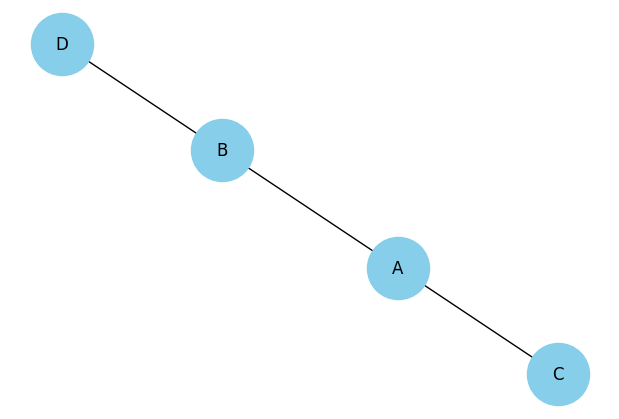

In [ ]:
# Red simple
G = nx.Graph()

# Agregar nodos
G.add_node("A")
G.add_nodes_from(["B", "C", "D"])

# Agregar aristas
G.add_edge("A", "B")
G.add_edges_from([("A", "C"), ("B", "D")])

# Dibujar la red
plt.figure(figsize=(6,4))
nx.draw(G, with_labels=True, node_color="skyblue", node_size=2000, font_size=12, font_color="black")
plt.show()


In [ ]:
# Listar nodos
print("Nodos:", G.nodes())

# Listar aristas
print("Aristas:", G.edges())

# Grado de cada nodo
print("Grado de los nodos:", dict(G.degree()))


Nodos: ['A', 'B', 'C', 'D']
Aristas: [('A', 'B'), ('A', 'C'), ('B', 'D')]
Grado de los nodos: {'A': 2, 'B': 2, 'C': 1, 'D': 1}


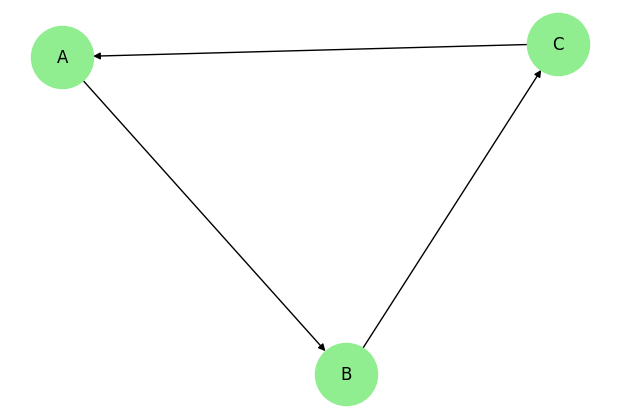

Grado de entrada: {'A': 1, 'B': 1, 'C': 1}
Grado de salida: {'A': 1, 'B': 1, 'C': 1}


In [ ]:
# Crear una red dirigida
DG = nx.DiGraph()
DG.add_edges_from([("A","B"), ("B","C"), ("C","A")])

plt.figure(figsize=(6,4))
nx.draw(DG, with_labels=True, node_color="lightgreen", node_size=2000, arrows=True, font_size=12)
plt.show()

print("Grado de entrada:", dict(DG.in_degree()))
print("Grado de salida:", dict(DG.out_degree()))


In [ ]:
# Caminos más cortos
print("Camino más corto de A a D:", nx.shortest_path(G, source="A", target="D"))

# Longitud del camino más corto
print("Longitud:", nx.shortest_path_length(G, "A", "D"))

# Componentes conexos
print("Componentes conexos:", list(nx.connected_components(G))) #Un componente conexo, es un subgrafo inducido de un grafo en que dos vertices cualquiera son conectados por un camino


Camino más corto de A a D: ['A', 'B', 'D']
Longitud: 2
Componentes conexas: [{'C', 'D', 'A', 'B'}]


In [ ]:
# Centralidad de grado
print("Centralidad de grado:", nx.degree_centrality(G)) #Medida que cuantifica el número de conexiones que tiene un nodo

# Centralidad de cercanía
print("Centralidad de cercanía:", nx.closeness_centrality(G)) #Mide la rapidez con la que un nodo puede llegar a los demás nodos

# Centralidad de intermediación
print("Centralidad de intermediación:", nx.betweenness_centrality(G)) #Mide la importancia de un nodo al contar cuantas veces actua como intermediario en los caminos mas cortos


Centralidad de grado: {'A': 0.6666666666666666, 'B': 0.6666666666666666, 'C': 0.3333333333333333, 'D': 0.3333333333333333}
Centralidad de cercanía: {'A': 0.75, 'B': 0.75, 'C': 0.5, 'D': 0.5}
Centralidad de intermediación: {'A': 0.6666666666666666, 'B': 0.6666666666666666, 'C': 0.0, 'D': 0.0}


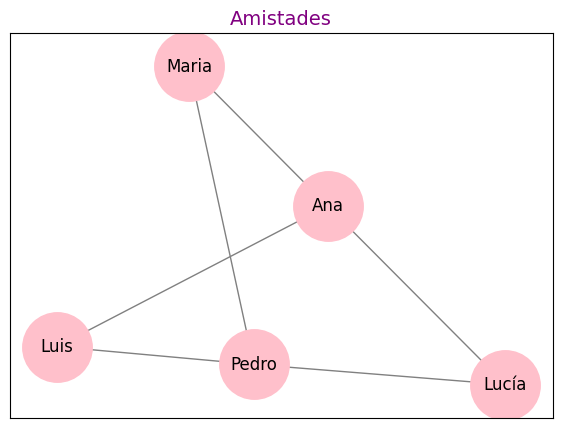

Centralidad de grado: {'Ana': 0.75, 'Luis': 0.5, 'Maria': 0.5, 'Pedro': 0.75, 'Lucía': 0.5}


In [ ]:
# Ejemplo del uso de las funciones
#Crear un grafo que represente amistades
social = nx.Graph()
social.add_edges_from([
    ("Ana", "Luis"),
    ("Ana", "Maria"),
    ("Luis", "Pedro"),
    ("Maria", "Pedro"),
    ("Pedro", "Lucía"),
    ("Lucía", "Ana")
])

plt.figure(figsize=(7,5))
nx.draw_networkx(social, node_color="pink", node_size=2500, font_size=12, font_color="black", edge_color="gray")
plt.title("Amistades", fontsize=14, color="Purple")
plt.show()

# ¿Quién es más "popular"?
print("Centralidad de grado:", nx.degree_centrality(social))


### Resumen

- **NetworkX** es una librería para trabajar con redes en Python.
- Permite crear redes simples, dirigidos y multigrafos.
- Se pueden calcular métricas de centralidad, caminos más cortos, grados y así.
- Tiene integración con Matplotlib para poder ver las redes.



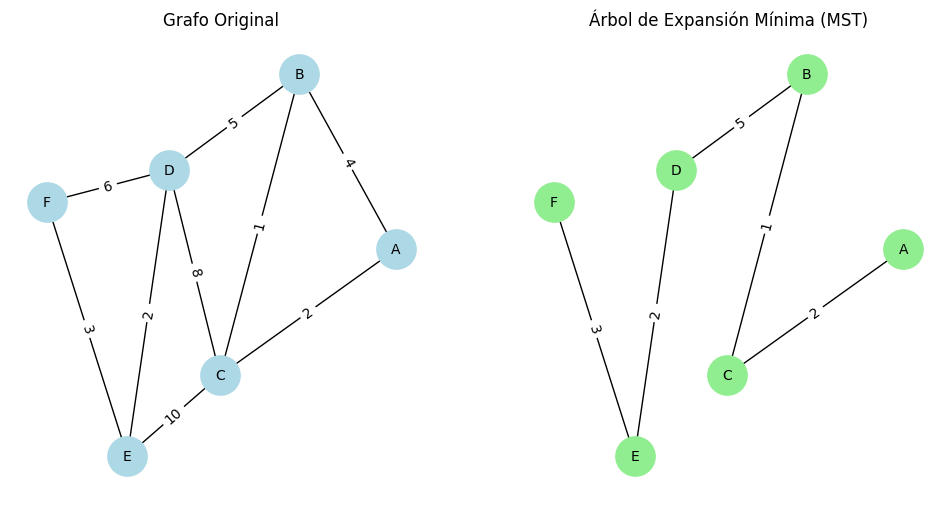

Peso total del Árbol de Expansión Mínima: 13


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

#Creamos una red

G = nx.Graph()

#Agregar nodos y aristas a la red
G.add_edge('A', 'B', weight=4)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'D', weight=5)
G.add_edge('C', 'D', weight=8)
G.add_edge('C', 'E', weight=10)
G.add_edge('D', 'E', weight=2)
G.add_edge('D', 'F', weight=6)
G.add_edge('E', 'F', weight=3)

#Obtener Árbol de Expansión Mínima usando Kruskal o Prim

mst = nx.minimum_spanning_tree(G, algorithm='kruskal')

#Dibujar grafo original

plt.figure(figsize=(12, 6))
plt.subplot(121)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Grafo Original")

#Dibujar Árbol de Expansión Mínima

plt.subplot(122)
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', node_size=800, font_size=10)
labels_mst = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=labels_mst)
plt.title("Árbol de Expansión Mínima (MST)")

plt.show()

#Mostrar el peso total del MST

peso_total = sum(nx.get_edge_attributes(mst, 'weight').values())
print("Peso total del Árbol de Expansión Mínima:", peso_total)